In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import numpy as np
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
import json
from datetime import datetime

In [2]:
# ------------------------------
# 1. Load Data
# ------------------------------
data = pd.read_csv("../data/simulation_security_labels_n-1.csv")

# Label encode the status
data["status_binary"] = data["status"].map({"secure": 1, "insecure": 0})

# Drop columns not used as features or explicitly specified
columns_to_drop = [
    "timestamp", "status", "status_binary", 
    "max_line_loading_percent_basecase",
    "min_bus_voltage_pu_basecase",
    "max_bus_voltage_pu_basecase",
    "max_line_loading_percent_contingency",
    "min_bus_voltage_pu_contingency",
    "max_bus_voltage_pu_contingency"
]
features_df = data.drop(columns=columns_to_drop, axis=1, errors="ignore")
target = data["status_binary"]

In [3]:
# Inspect the timestamp column
data['timestamp'] = pd.to_datetime(data['timestamp'])
print("Time range:", data['timestamp'].min(), "→", data['timestamp'].max())
print("First 5 timestamps:")
print(data['timestamp'].head(5))
print("Are they in increasing order?", data['timestamp'].is_monotonic_increasing)

Time range: 2023-01-01 00:00:00 → 2023-12-31 23:00:00
First 5 timestamps:
0   2023-01-01 00:00:00
1   2023-01-01 01:00:00
2   2023-01-01 02:00:00
3   2023-01-01 03:00:00
4   2023-01-01 04:00:00
Name: timestamp, dtype: datetime64[ns]
Are they in increasing order? False


In [ ]:
# ------------------------------
# 2. Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    features_df, target, 
    test_size=0.2, 
    random_state=42, 
    stratify=target
)

In [5]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train class distribution:\n", y_train.value_counts())

X_train shape: (7892, 265)
X_test shape: (877, 265)
y_train class distribution:
 status_binary
1    4047
0    3845
Name: count, dtype: int64


In [6]:
# ------------------------------
# 3. Train the Classifier
# ------------------------------
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# ------------------------------
# 4. Evaluate
# ------------------------------
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9327251995438997
Confusion Matrix:
[[396  31]
 [ 28 422]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       427
           1       0.93      0.94      0.93       450

    accuracy                           0.93       877
   macro avg       0.93      0.93      0.93       877
weighted avg       0.93      0.93      0.93       877




 Confusion Matrix:


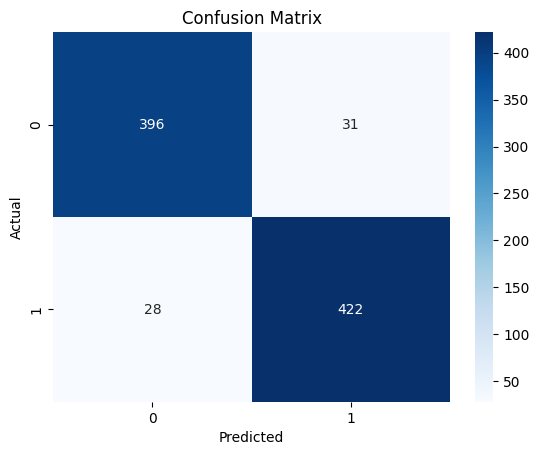

In [8]:
print("\n Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

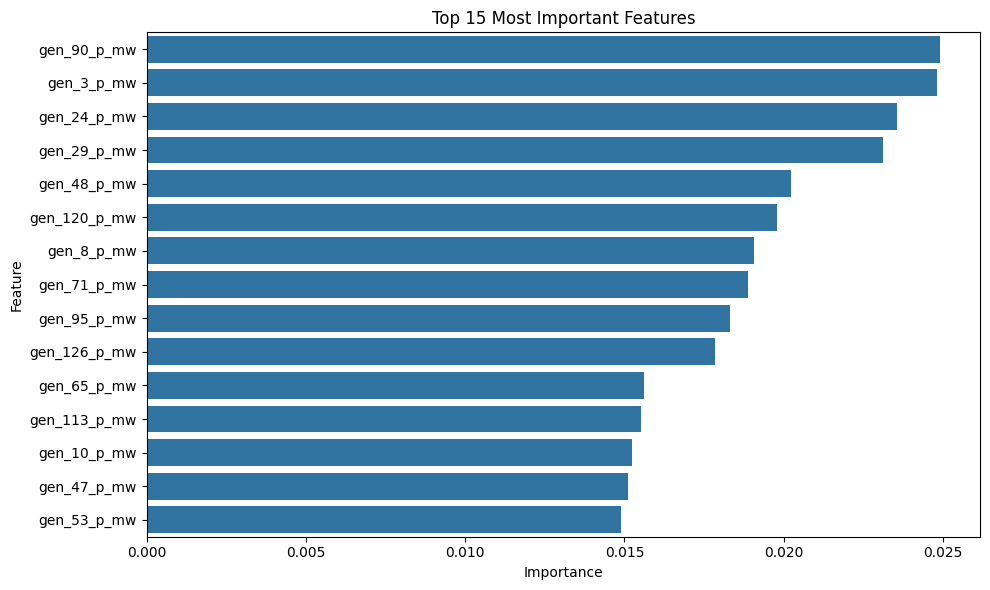

In [9]:
# ----------------------------
# 4. Feature importance
# ----------------------------
importances = clf.feature_importances_
features = X_train.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title("Top 15 Most Important Features")
plt.tight_layout()
plt.show()

In [10]:
# ----------------------------
# 5. Save model and evaluation metrics
# ----------------------------

# Create timestamp
now = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

with open(f"../models/random_forest_model_{now}.pkl", "wb") as model_file:
    pickle.dump(clf, model_file)

# Save metrics as JSON
metrics = {
    "accuracy": acc,
    "classification_report": report,
    "timestamp": now
}

with open(f"../models/model_metrics_{now}.json", "w") as f:
    json.dump(metrics, f, indent=4)

In [11]:
### želimo pogledat če lah izboljšat accuray od spodaj je moja koda

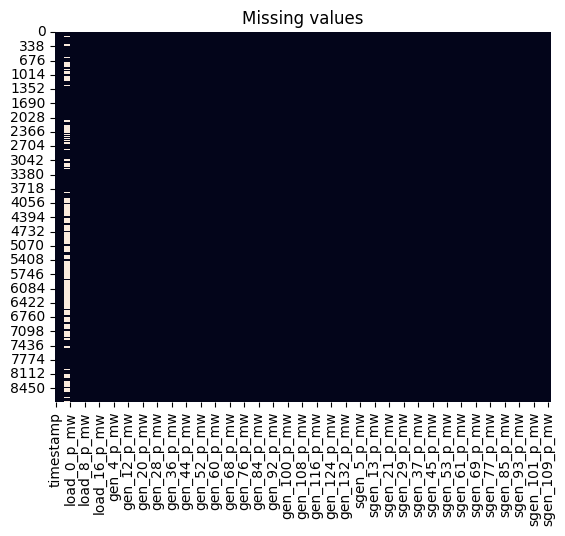

In [12]:
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing values")
plt.show()

In [13]:
# Check for any remaining missing values
missing = data.isnull().sum()
print("Columns with missing values:\n", missing[missing > 0])

Columns with missing values:
 max_line_loading_percent_contingency    4272
min_bus_voltage_pu_contingency          4272
max_bus_voltage_pu_contingency          4272
dtype: int64


In [14]:
##zgornji columni itak ne pridejo v model tak da ma dataset polne vrednosti